# Vpliv nevzmetene mase in-wheel pogona na dinamiko vožnje

Pri uporabi elektromotorjev, integriranih v platišče avtomobil, je eden ključnih pomislekov vpliv povečanja mase kolesa na dinamiko vožnje. Masa kolesa se namreč smatra kot nevzmetena masa, ker je togost pnevmatike bistveno višja od togosti avtomobilske vzmeti. V sklopu seminarske naloge naj se postavi model kinematsko vzbujanega sistema z dvema prostostnima stopnjama, ki ponazarja sistem cesta - avtomobilsko kolo - šasija. Preko principov konvolucije, Fourierjeve vrste in pristopa z numerično integracijo naj se izračunajo in ovrednotijo vplivi povečanja nevzmetene mase na vibracije, ki jih čuti voznik (šasija) in kolo.

#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [1]:
#! pip install ipynb --upgrade

In [2]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
import funkcije_seminar as f;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_14244\1993208459.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{D}] \cdot \{\dot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$
$$[\bf{M}] \cdot \{\ddot{x}\} + [\bf{K}] \cdot \{x\} = \{ F(t)\}$$

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [3]:
t = f.neodvisna_spremenljivka_t(40);

In [4]:
# https://kktse.github.io/jekyll/update/2021/07/18/re71r-255-40-r17-tire-vertical-stiffness.html
m1 = 10; # kg
k1 = 260; # N/mm
k1 = 260 * 1000; # N/mm -> N/m

# https://www.wheel-size.com/tire/iso-metric-255-40-R-17/
# https://rennlist.com/forums/992-gt3-and-gt2rs-forum/1257892-what-are-the-spring-rate-numbers.html
m2 = 350; # kg
k2 = 4; # N/mm (40, 60, 100 (911 GT3 RS)))
k2 = 40 * 1000; # N/mm -> N/m

M = f.mass_matrix(m1, m2);
K = f.stiffness_matrix(k1, k2);

print('M = ')
print(M)
print('K = ')
print(K)

M = 
[[ 10.   0.]
 [  0. 350.]]
K = 
[[300000. -40000.]
 [-40000.  40000.]]


#### Lastne vrednosti, lastni vektorji

V obliki:
$$ \omega_{0n} = \{ \omega_1, \omega_2, ..., \omega_N \}$$
$$[X]
   = \begin{bmatrix}  X^1_{\omega_1} X^1_{\omega_2}\\ X^2_{\omega_1} X^2_{\omega_2} \end{bmatrix} $$


In [5]:
A = np.linalg.inv(M) @ K

eigenval, eigenvec = np.linalg.eig(A)
eigenvalues, eigenvectors = f.eig(eigenval, eigenvec)


eigenvalues
[  9.94973207 173.24920937]
 
eigenvectors
[[ 0.13259361  0.9999927 ]
 [ 0.99117049 -0.00382211]]


In [6]:
print(f'{eigenvalues[0]:.3f} rad/s \t=>\t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t=>\t {eigenvectors[:,1]}')

9.950 rad/s 	=>	 [0.13259361 0.99117049]
173.249 rad/s 	=>	 [ 0.9999927  -0.00382211]


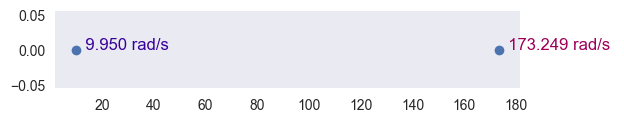

omega1 	 = 9.950 rad/s
omega2 	 = 173.249 rad/s


In [7]:
plt.figure(figsize=(6,1))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[0]
omega2 = eigenvalues[1]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_14244\3423461170.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


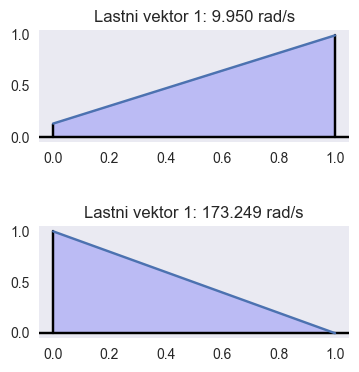

In [8]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.title(f'Lastni vektor 1: {eigenvalues[0]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])
# add horizontal space
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,1,2)
plt.title(f'Lastni vektor 1: {eigenvalues[1]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])


In [9]:
modal_mass_m, modal_stiffness_m = f.modal_mass_stiffness(eigenvectors, M, K)
print('modal_mass_m = ')
print(modal_mass_m)
print("  ")
print('modal_stiffness_m = ')
print(modal_stiffness_m)

modal_mass_m = 
[[344.02243764   0.        ]
 [  0.          10.00496689]]
  
modal_stiffness_m = 
[[ 34057.24715418      0.        ]
 [     0.         300301.96823944]]


### Preverjanje $\omega_1$ in $\omega_2$

In [10]:
omega11 = np.sqrt(modal_stiffness_m[0,0]/modal_mass_m[0,0])
omega22 = np.sqrt(modal_stiffness_m[1,1]/modal_mass_m[1,1])

print(f'modal stiffness 1 \t = \t{modal_stiffness_m[0,0]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_m[0,0]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_m[1,1]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_m[1,1]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')

modal stiffness 1 	 = 	34057.247 N/m
modal mass 1 		 = 	344.02 kg
omega1 			 = 	9.95 rad/s
 
modal stiffness 2 	 = 	300301.968
modal mass 2 		 = 	10.00
omega2 			 = 	173.25 rad/s


In [11]:
print(f'omega1 \t = {omega1:.3f} rad/s   \t\t omega11 \t = {omega11:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s \t\t omega22 \t = {omega22:.3f} rad/s')

omega1 	 = 9.950 rad/s   		 omega11 	 = 9.950 rad/s
omega2 	 = 173.249 rad/s 		 omega22 	 = 173.249 rad/s


### Definicija dušenja in $\omega_D$

In [12]:
d_krit1 = np.sqrt(k1/m1)
d_krit2 = np.sqrt(k2/m2)
delta1 = 0.15;
delta2 = 0.05;
print(f'delta1 = {delta1:.2f} \t delta1_krit = {d_krit1:.2f}')
print(f'delta2 = {delta2:.2f} \t delta2_krit = {d_krit2:.2f}')

delta1 = 0.15 	 delta1_krit = 161.25
delta2 = 0.05 	 delta2_krit = 10.69


In [13]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(" ")
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1 = 9.95 rad/s
omega1D = 9.84 rad/s
 
omega2 = 173.25 rad/s
omega2D = 173.03 rad/s


### Relativni pomiki $x_1(t)$ glede na $y(t)$

$$\{z\} = \{x\} - y(t)$$
$$\{z\}
   = \begin{bmatrix}  x_1(t) - y(t) \\ x_2(t) - y(t) \end{bmatrix} $$

## Definicija vzbujanja

$$[\bf{M}] \cdot \{\ddot{z}\} + [\bf{K}] \cdot \{z\} = - [\bf{M}] \cdot [\bf{B}] \cdot \ddot{y} (t)$$

"Ležeči policaj" je dolg cca 0.5m in je lahko visok 5cm. Če želimo dobiti pravilni y(t) glede na hitrost:

In [14]:
hitrost = 0.315; # 20 m/s = 72 km/h
L = 0.5; # m

In [15]:
t[1000]

1.0

1.5873015873015872
0.315


(0.0, 2.0)

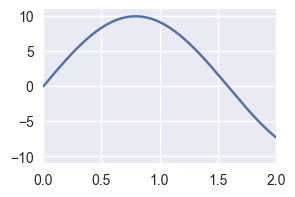

In [16]:
ff = 1/(2*L/hitrost); # Hz
o = 10; # m - amplituda
y = o * np.sin(2 * np.pi * ff * t)
plt.figure(figsize=(3,2))
plt.plot(t, y)
t1 = 1/(2*ff);
print(t1)
print(ff)
plt.xlim(0, 2)

In [17]:
t11 = t1 % (t[1] - t[0])
T1 = t1 - t11
t_index = np.where(t == T1)
t2 = 1000 + t_index[0][0]
t2

2587

Text(0.5, 0, 't [s]')

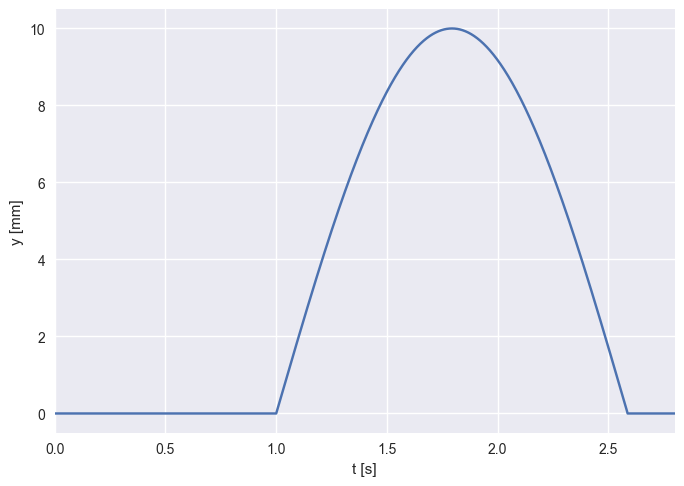

In [18]:
Y = np.zeros_like(t)
t_index = np.where(t == T1)
t2 = 1000 + t_index[0][0]
# t[t_index][0]
Y[1000:t2] = y[0:t2-1000]
plt.plot(t[:5000], Y[:5000])
plt.xlim(0, 2.8)
plt.ylabel('y [mm]')
plt.xlabel('t [s]')

$Y_2$ je drugi odvod (pospešek) od $Y$

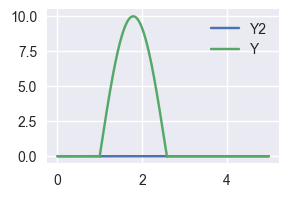

In [19]:
#second derivative of y
Y2 = np.gradient(np.gradient(Y))
plt.figure(figsize=(3,2))
plt.plot(t[:5000], Y2[:5000], label='Y2')
plt.plot(t[:5000], Y[:5000], label='Y')
plt.legend()

Definicija vektorja usmeritev $B$

In [20]:
B = np.ones((2,1))
print(B)

[[1.]
 [1.]]


In [21]:
Ft = np.zeros((2, len(t)))
Ft = - M @ B * Y2

$$[\bf{M}] \cdot \{\ddot{z}\} + [\bf{K}] \cdot \{z\} = - [\bf{M}] \cdot [\bf{B}] \cdot \ddot{y} (t)$$

Pri prehodu v modalne koordinate:
$$leva \ stran = [\Phi]^T \cdot \{ F(t)\}

In [22]:
Modal_Ft = eigenvectors.T @ Ft

Ne pozabimo: zdaj je: $$z(t) = [\Phi]^T \cdot \xi (t)$$

## Konvolucija

#### Definicija g funkcije

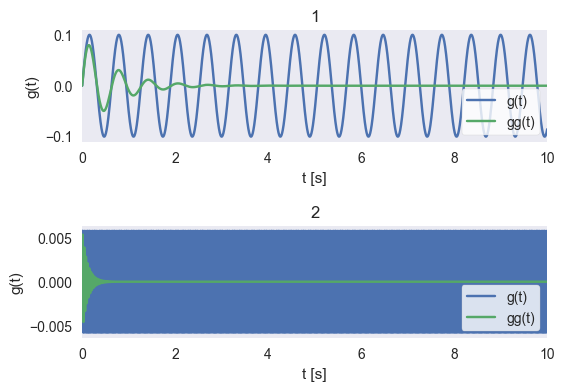

In [23]:
g_func1 = 1/omega1 * np.sin(omega1 * t)
g_func2 = 1/omega2 * np.sin(omega2 * t)

gg_func1 = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
gg_func2 = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title("1")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func1)
plt.plot(t, gg_func1) 
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("2")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func2)
plt.plot(t, gg_func2)
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$

In [24]:
#eta1
eta1 = np.convolve(Modal_Ft[0,:], g_func1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2 = np.convolve(Modal_Ft[1,:], g_func2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], gg_func2) * (t[1] - t[0])

print(f'size of eta2: {eta2.size}')

size of eta2: 80001


In [25]:
eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

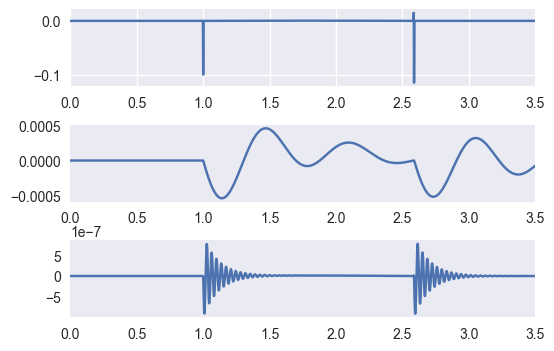

In [26]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.xlim(0, 3.5)

plt.subplot(3,1,2)
plt.xlim(0, 3.5)
# plt.plot(t, eta1[:len(t)])
plt.plot(t, eta1d[:len(t)])
plt.grid()
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,3)
plt.xlim(0, 3.5)
# plt.plot(t, eta2[:len(t)])
plt.plot(t, eta2d[:len(t)])
plt.grid()

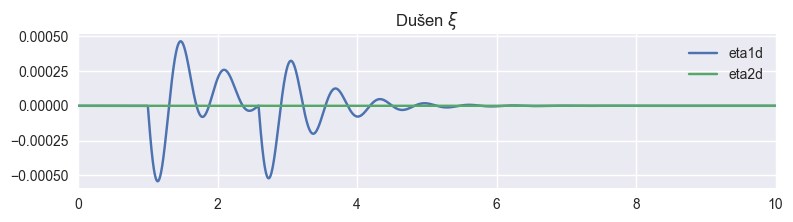

In [27]:
plt.figure(figsize=(9,2))
plt.title(r'Dušen $\xi$')
plt.xlim(0, 10)
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

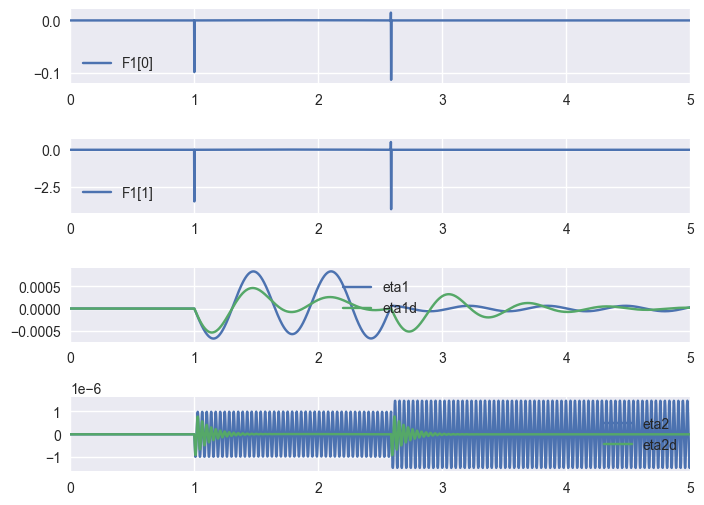

In [28]:
#plot eta1, eta2 
plt.figure(figsize=(8,6))

#range axis
plt.subplot(4,1,1)
plt.xlim(0, 5)
plt.plot(t, Ft[0], label='F1[0]')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(4,1,2)
plt.xlim(0, 5)
plt.plot(t, Ft[1], label='F1[1]')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(4,1,3)
plt.xlim(0, 5)
plt.plot(t, eta1[:len(t)], label='eta1')
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(4,1,4)
plt.xlim(0, 5)
plt.plot(t, eta2[:len(t)] ,label='eta2')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

### Iz modalnega prostora nazaj v realnega

$$\{z(t)\}=[\Phi] \cdot \{\xi(t)\}$$

In [29]:
eigenvectors[:,0] 

array([0.13259361, 0.99117049])

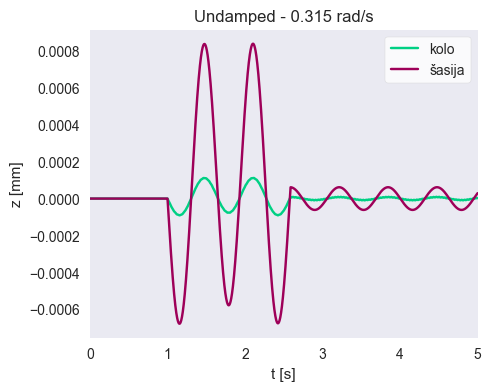

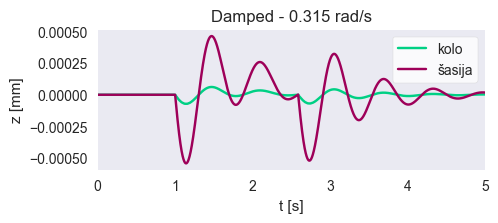

In [30]:
v_pom = 0
z1_1 = eigenvectors[:,0] @ eta
z1_2 = eigenvectors[:,1] @ eta

z1_1D = eigenvectors[:,0] @ etaD
z1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 5)
plt.xlabel('t [s]')
plt.ylabel('z [mm]')
plt.plot(t, z1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + z1_2[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# plt.savefig(f'./x_{ff}rad_s.png', dpi=300)

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.subplot(2,1,1)
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 5)
plt.xlabel('t [s]')
plt.ylabel('z [mm]')
# plt.plot(t, Y, color = colors[0])
plt.plot(t, z1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + z1_2D[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
# plt.savefig(f'./xD_{ff}rad_s.png', dpi=300)


$$[x(t)] = [z(t)] + y(t)$$

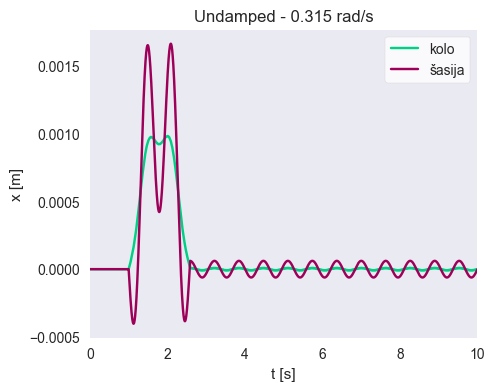

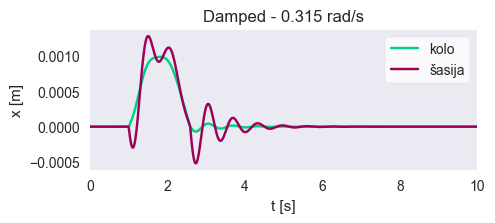

In [31]:

v_pom = 0
scale = 1/10000
x1_1 = z1_1[:len(t)] + scale * Y[:len(t)]
x1_2 = z1_2[:len(t)] + scale * Y[:len(t)]

x1_1D = z1_1D[:len(t)] + scale * Y[:len(t)]
x1_2D = z1_2D[:len(t)] + scale * Y[:len(t)]

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title(f'Undamped - {ff:.3f} rad/s')
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# plt.savefig(f'./x_{ff}rad_s.png', dpi=300)

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.subplot(2,1,1)
plt.title(f'Damped - {ff:.3f} rad/s')
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
# plt.savefig(f'./xD_{ff}rad_s.png', dpi=300)


In [32]:
# #create figure with 2 rows and 2 columns plots
# fig, axs = plt.subplots(2, 2, figsize=(8,4))
# #set title
# fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPomiki')
# #limit x
# axs[0, 0].set_xlim(3, 20)
# axs[0, 1].set_xlim(3, 20)
# axs[1, 0].set_xlim(3, 20)
# axs[1, 1].set_xlim(3, 20)
# #set x and y labels
# axs[0, 0].set_xlabel('t [s]')
# axs[0, 0].set_ylabel('x [mm]')
# axs[0, 1].set_xlabel('t [s]')
# axs[0, 1].set_ylabel('x [mm]')
# axs[1, 0].set_xlabel('t [s]')
# axs[1, 0].set_ylabel('x [mm]')
# axs[1, 1].set_xlabel('t [s]')
# axs[1, 1].set_ylabel('x [mm]')
# #plot x1_1 and x1_2
# axs[0, 0].plot(t, x1_1[:len(t)], color = colors[6])
# axs[0, 0].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
# axs[0, 0].grid()
# axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[0, 1].plot(t, x1_1D[:len(t)], color = colors[6])
# axs[0, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
# axs[0, 1].grid()
# axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1 and x1_2
# axs[1, 0].plot(t, x1_1[:len(t)], color = colors[6])
# axs[1, 0].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
# axs[1, 0].grid()
# axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
# axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
# axs[1, 1].grid()
# axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #save figure
# plt.savefig(f'./x4_{ff}rad_s.png', dpi=300)

In [33]:
# create x11 and x12 as second derivatives of x1_1 and x1_2
a11 = np.zeros(len(t))
a12 = np.zeros(len(t))
a11D = np.zeros(len(t))
a12D = np.zeros(len(t))
# create a11 as second derivatives of a1_1
for i in range(1, len(t)-1):
    a11[i] = (x1_1[i+1] - 2*x1_1[i] + x1_1[i-1]) / (t[i+1] - t[i])**2
    a12[i] = (x1_2[i+1] - 2*x1_2[i] + x1_2[i-1]) / (t[i+1] - t[i])**2
    a11D[i] = (x1_1D[i+1] - 2*x1_1D[i] + x1_1D[i-1]) / (t[i+1] - t[i])**2
    a12D[i] = (x1_2D[i+1] - 2*x1_2D[i] + x1_2D[i-1]) / (t[i+1] - t[i])**2


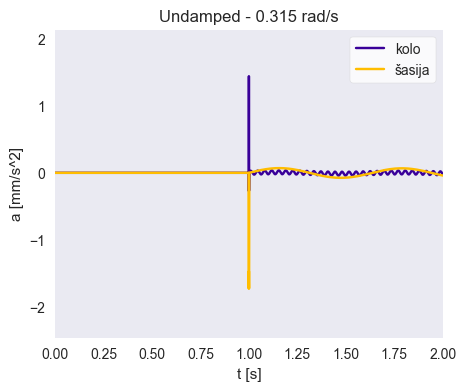

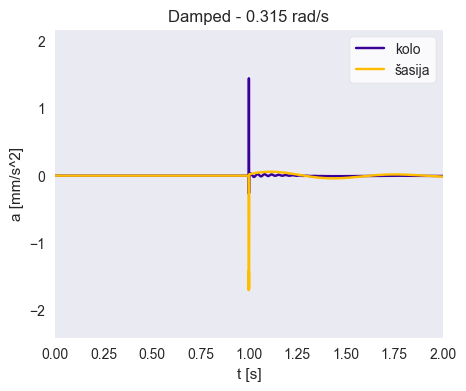

In [34]:
# plot x11 and x12
plt.figure(figsize=(5, 4))
plt.title(f'Undamped - {ff} rad/s')
plt.xlim(0, 2.0)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11[:len(t)], color=colors[0])
plt.plot(t, a12[:len(t)], color=colors[4])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

# plot x11D and x12D
plt.figure(figsize=(5, 4))
plt.title(f'Damped - {ff} rad/s')
plt.xlim(0, 2.0)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11D[:len(t)], color=colors[0])
plt.plot(t, a12D[:len(t)], color=colors[4])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')


In [35]:
# #create figure with 2 rows and 2 columns plots
# fig, axs = plt.subplots(2, 2, figsize=(10,6))

# # plt.subplots_adjust(bottom=0.5, top=2.9)
# #set title
# fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\n', fontsize=12)
# #limit x
# axs[0, 0].set_xlim(3, 20)
# axs[1, 0].set_xlim(3, 20)

# #set x and y labels
# axs[0, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
# axs[1, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
# # remove x ticks
# axs[0, 0].set_xticks([]) 
# axs[0, 1].set_xticks([])
# #plot x1_1 and x1_2
# axs[0, 0].plot(t, a11[:len(t)], color = colors[6])
# axs[0, 0].plot(t, v_pom + a12[:len(t)], color = colors[1])
# axs[0, 0].grid()
# # axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[1, 0].plot(t, a11D[:len(t)], color = colors[6])
# axs[1, 0].plot(t, v_pom + a12D[:len(t)], color = colors[1])
# axs[1, 0].grid()
# # axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')


# #set title
# fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPospeški                                                       Pomiki', fontsize=16)
# #limit x
# axs[0, 1].set_xlim(3, 20)
# axs[1, 1].set_xlim(3, 20)
# #set x and y labels
# plt.subplots_adjust(hspace=0.2)
# axs[1, 0].set_xlabel(r'$t \ [s]$')
# axs[0, 1].set_ylabel(r'$x  [mm]$')
# axs[1, 1].set_xlabel(r'$t \ [s]$')
# axs[1, 1].set_ylabel(r'$x  [mm]$')
# #plot x1_1 and x1_2
# axs[0, 1].plot(t, x1_1[:len(t)], color = colors[6])
# axs[0, 1].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
# axs[0, 1].grid()
# # axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
# axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
# axs[1, 1].grid()
# # axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')

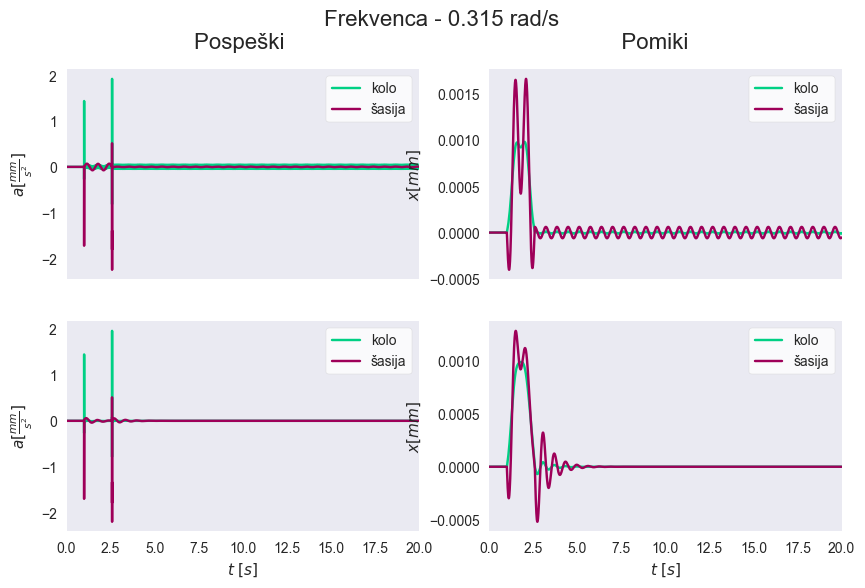

In [36]:
#create figure with 2 rows and 2 columns plots
fig, axs = plt.subplots(2, 2, figsize=(10,6))

# plt.subplots_adjust(bottom=0.5, top=2.9)
#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\n', fontsize=12)
#limit x
axs[0, 0].set_xlim(0, 20)
axs[1, 0].set_xlim(0, 20)

#set x and y labels
axs[0, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
axs[1, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
# remove x ticks
axs[0, 0].set_xticks([]) 
axs[0, 1].set_xticks([])
#plot x1_1 and x1_2
axs[0, 0].plot(t, a11[:len(t)], color = colors[6])
axs[0, 0].plot(t, v_pom + a12[:len(t)], color = colors[1])
axs[0, 0].grid()
axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 0].plot(t, a11D[:len(t)], color = colors[6])
axs[1, 0].plot(t, v_pom + a12D[:len(t)], color = colors[1])
axs[1, 0].grid()
axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')


#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPospeški                                                       Pomiki', fontsize=16)
#limit x
axs[0, 1].set_xlim(0, 20)
axs[1, 1].set_xlim(0, 20)
#set x and y labels
plt.subplots_adjust(hspace=0.2)
axs[1, 0].set_xlabel(r'$t \ [s]$')
axs[0, 1].set_ylabel(r'$x  [mm]$')
axs[1, 1].set_xlabel(r'$t \ [s]$')
axs[1, 1].set_ylabel(r'$x  [mm]$')
#plot x1_1 and x1_2
axs[0, 1].plot(t, x1_1[:len(t)], color = colors[6])
axs[0, 1].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
axs[0, 1].grid()
axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
axs[1, 1].grid()
axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
plt.savefig(f'./rez_m1_{m1}_{ff:3f}_rad_s.png', dpi=300)